# Минимизация гладкой функции

**1.** Рассмотрим все ту же функцию из задания по линейной алгебре: $ f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) $, но теперь уже на промежутке `[1, 30]`

**2.** В первом задании будем искать минимум этой функции на заданном промежутке с помощью `scipy.optimize`. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а $ f(x) $ мы рассмотрим как удобный учебный пример.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp 
from scipy import optimize

**3.** Напишите на Питоне функцию, вычисляющую значение $ f(x) $ по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции $ sin $ и $ exp $ нужно импортировать из модуля `math`.

In [2]:
f = lambda x: np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

**4.** Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

**5.** Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [5]:
res = sp.optimize.minimize(f, 2)

In [6]:
print(res)

fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


In [7]:
res = sp.optimize.minimize(f, 10)
print(res)

fun: 1.7452682903428007
 hess_inv: array([[6.04868658]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 3
     njev: 13
   status: 0
  success: True
        x: array([4.13630013])


In [9]:
res = sp.optimize.minimize(f, 15)
print(res)

fun: -11.503580757136064
 hess_inv: array([[49.07086822]])
      jac: array([-0.62828672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 1
     njev: 19
   status: 2
  success: False
        x: array([24.67766109])


In [13]:
res = sp.optimize.minimize(f, 30)
print(res)

fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


**6.** Укажите в scipy.optimize.minimize в качестве метода `BFGS` (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения $x=2$. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [17]:
res_1 = sp.optimize.minimize(f, 2, method='BFGS')
print(res_1)

fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


**7.** Теперь измените начальное приближение на $x=30$. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [18]:
res_2 = sp.optimize.minimize(f, 30, method='BFGS')
print(res_2)

fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


**8.** Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

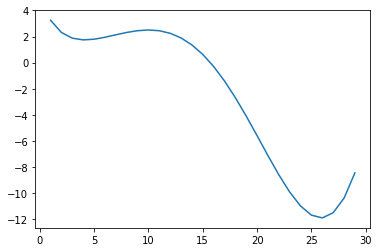

In [44]:
x=np.arange(1, 30, 1)
plt.plot(x, f(x))

# Глобальная оптимизация

**1.** Теперь попробуем применить к той же функции $f(x)$ метод глобальной оптимизации — дифференциальную эволюцию.

**2.** Изучите документацию и примеры использования функции scipy.optimize.differential_evolution

**3.** Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

**4.** Запустите поиск минимума функции $f(x)$ с помощью дифференциальной эволюции на промежутке `[1, 30]`. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [29]:
result = sp.optimize.differential_evolution(f, [(1, 30)])
print(result)

fun: array([-11.89889467])
     jac: array([-1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019259])


**5.** Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

**6.** Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

# Минимизация негладкой функции

**1.** Теперь рассмотрим функцию $h(x) = int(f(x))$ на том же отрезке `[1, 30]`, т.е. теперь каждое значение $f(x)$ приводится к типу int и функция принимает только целые значения.

In [45]:
h = lambda x: int(f(x))

**2.** Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график $h(x)$ с помощью matplotlib.

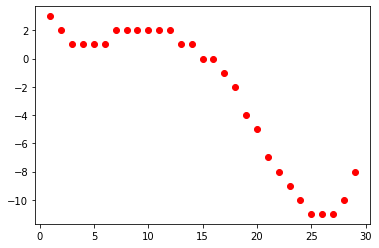

In [60]:
H = np.asarray([h(x) for x in x])
plt.plot(x, H, 'ro')

**3.** Попробуйте найти минимум функции $h(x)$ с помощью `BFGS`, взяв в качестве начального приближения $x=30$. Получившееся значение функции – ваш первый ответ в этой задаче.

In [64]:
result_bgfs = sp.optimize.minimize(h, 30, method='BFGS')
result_bgfs

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

**4.** Теперь попробуйте найти минимум $h(x)$ на отрезке `[1, 30]` с помощью дифференциальной эволюции. Значение функции $h(x)$ в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [66]:
result_dif_evol = sp.optimize.differential_evolution(h, [(1, 30)])
result_dif_evol

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.83430616])

**5.** Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

**6.**Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.